# 6.4 Machine Learning

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/mariazaremba/Documents/CareerFoundry/Health & Development Indicators: Global Insights'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Life_Expectancy_Data_CLEAN.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Life Expectancy',
       'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles Immunization', 'BMI', 'Under-Five Deaths',
       'Polio', 'Total Expenditure', 'Diphtheria Coverage',
       'HIV/AIDS Prevalence', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition', 'Schooling'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,...,Polio,Total Expenditure,Diphtheria Coverage,HIV/AIDS Prevalence,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition,Schooling
0,0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,5,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,...,66,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,6,Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,...,63,9.42,63,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,7,Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,...,64,8.33,64,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,8,Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,...,63,6.73,63,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,9,Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,...,58,7.43,58,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [7]:
df.shape

(1649, 23)

In [11]:
df = df.drop(['Unnamed: 0', 'Status'], axis=1)

In [12]:
df.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles Immunization,BMI,...,Polio,Total Expenditure,Diphtheria Coverage,HIV/AIDS Prevalence,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition,Schooling
0,Afghanistan,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,59.9,271,64,0.01,73.523582,62,492,18.6,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,59.9,268,66,0.01,73.219243,64,430,18.1,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Hypothesis:** There might be a correlation between alcohol consumption ('Alcohol') and 'Life Expectancy'. Higher alcohol consumption could potentially lead to lower life expectancies.

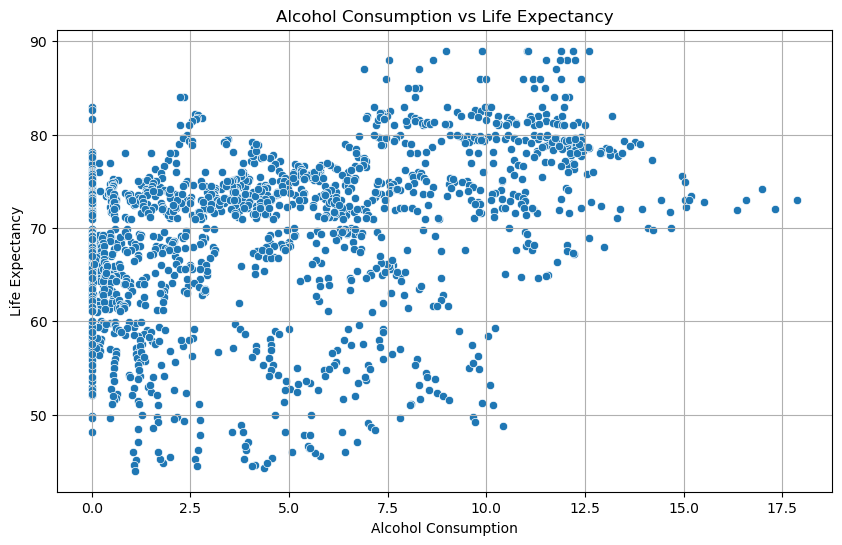

In [60]:
# Scatterplot for Alcohol vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Alcohol', y='Life Expectancy')
plt.title('Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

### 3. Data prep for regression analysis

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Alcohol'].values.reshape(-1,1)
y = df['Life Expectancy'].values.reshape(-1,1)

In [53]:
X

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [4.43],
       [1.72],
       [1.68]])

In [54]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [55]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [56]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

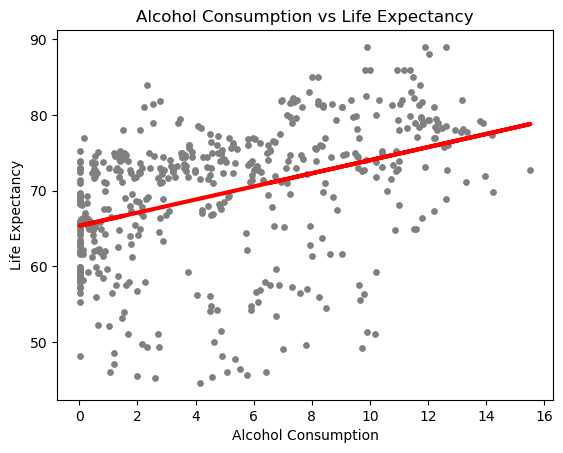

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Alcohol Consumption vs Life Expectancy')
plot_test.xlabel('Alcohol Consumption')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [61]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86687327]]
Mean squared error:  68.15170545608036
R2 score:  0.16782788869155774


### Interpretation:
1. The positive slope indicates a positive correlation between 'Alcohol' consumption and 'Life Expectancy'.
2. However, the R-squared value of 0.168 suggests that 'Alcohol' consumption alone might not be a strong predictor of 'Life Expectancy'. Other factors not included in the model could be influencing life expectancy as well.
3. The Mean Squared Error (MSE) of 68.15 indicates that, on average, the model's predictions are approximately 68.15 units away from the actual 'Life Expectancy' values. Lower MSE values are desirable, but the interpretation should consider the context of the data.

In summary, while there is a positive relationship between 'Alcohol' consumption and 'Life Expectancy' based on the slope, the low R-squared value suggests that 'Alcohol' consumption alone might not be a comprehensive predictor of 'Life Expectancy', and other variables might need to be considered for a more accurate model.

In [63]:
y_predicted

array([[71.04955135],
       [75.5919673 ],
       [69.87927243],
       [70.64212091],
       [72.3065176 ],
       [75.21054306],
       [66.69784752],
       [74.17029513],
       [67.08794049],
       [74.88113122],
       [73.19939707],
       [71.63902518],
       [71.55233785],
       [70.00930342],
       [74.90713741],
       [70.3733902 ],
       [69.76657891],
       [66.09970496],
       [65.37153141],
       [65.37153141],
       [72.60125451],
       [69.60187298],
       [65.54490607],
       [69.59320425],
       [65.73561819],
       [65.76162439],
       [65.58824973],
       [73.78020216],
       [72.21983027],
       [72.6792731 ],
       [71.18825107],
       [67.38267741],
       [65.37153141],
       [70.66812711],
       [68.80434957],
       [69.64521665],
       [71.57834405],
       [67.38267741],
       [75.62664223],
       [66.0823675 ],
       [77.68113189],
       [65.9783427 ],
       [75.54862364],
       [65.82230551],
       [73.91890188],
       [71

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,57.5,71.049551
1,81.7,75.591967
2,75.6,69.879272
3,56.6,70.642121
4,61.4,72.306518
5,79.9,75.210543
6,54.0,66.697848
7,51.0,74.170295
8,45.5,67.087940
9,72.9,74.881131


#### Compare how the regression fits the training set

In [65]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [66]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86687327]]
Mean squared error:  63.35832231071975
R2 score:  0.15870138446412185


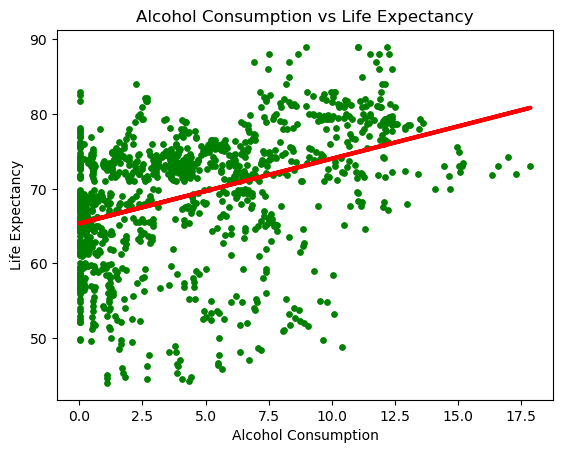

In [68]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Alcohol Consumption vs Life Expectancy')
plot_test.xlabel('Alcohol Consumption')
plot_test.ylabel('Life Expectancy')
plot_test.show()